# Chapter 1: Two Pointers

## Pair Sum - Sorted


Given an array of integers sorted in ascending order and a target value, return the indexes of any pair of numbers in the array that sum to the target. The order of the indexes in the result doesn't matter. If no pair is found, return an empty array.

Example 1:
Input: nums = [-5, -2, 3, 4, 6], target = 7
Output: [2, 3]
Explanation: nums[2] + nums[3] = 3 + 4 = 7

Example 2:
Input: nums = [1, 1, 1], target = 2
Output: [0, 1]
Explanation: other valid outputs could be [1, 0], [0, 2], [2, 0], [1, 2] or [2, 1].


In [ ]:
# approach 1:
def twoNumberSum(array, targetSum):
    for i in range(len(array)):
        # sort the array
        array = sorted(array)
        # define left, right pointers
        left = i
        right = len(array) - 1

        # run a loop until left and right are equal
        while left < right:
            # compute sum
            sum = array[left] + array[right]
            # if sum < target, pick a large number from left
            if sum < targetSum:
                left += 1
            # elif sum > target, pick a small number from right
            elif sum > targetSum:
                right -= 1
            # else we found a pair, return them
            else:
                return [array[left], array[right]]
        # if nothing is found, just return the empty list
        return []

In [27]:
# approach 2: complement (other number seen) based
def twoNumberSum(array, targetSum):
    # keep a record of seen numbers
    seen_numbers = set()

    # run a loop over the array
    for num in array:
        # get the complement/ other number
        complement = targetSum - num
        # check if this complement is already in the seen numbers
        if complement in seen_numbers:
            # return the complement, current number
            return [num, complement]
        # just add the current number to the seen numbers
        seen_numbers.add(num)
    # if no pair is found return an empty list
    return []

In [28]:
array = [1, 2, 3, 4, 5, 6, 7, 8, 9]
targetSum = 17
array.sort()

twoNumberSum(array=array, targetSum=targetSum)

[9, 8]

## Triplet sum


- [bytebytego](https://bytebytego.com/exercises/coding-patterns/two-pointers/triplet-sum)


Given an array of integers, return all triplets [a, b, c] such that a + b + c = 0 . The solution must not contain duplicate triplets (e.g., [1, 2, 3] and [2, 3, 1] are considered duplicates). If no such triplets are found, return an empty array.

Each triplet can be arranged in any order, and the output can be returned in any order.

Example:
Input: nums = [0, -1, 2, -3, 1]
Output: [[-3, 1, 2], [-1, 0, 1]]

In [108]:
from typing import List


def triplet_sum(nums: List[int]) -> List[List[int]]:
    triplets = []
    nums.sort()
    for i in range(len(nums)):
        # Optimization: triplets consisting of only positive numbers
        # will never sum to 0.

        if nums[i] > 0:
            break
        # To avoid duplicate triplets, skip 'a' if it's the same as
        # the previous number.
        if i > 0 and nums[i] == nums[i - 1]:
            continue
        # Find all pairs that sum to a target of '-a' (-nums[i]).
        pairs = pair_sum_sorted_all_pairs(nums, i + 1, -nums[i])
        for pair in pairs:
            triplets.append([nums[i]] + pair)
    return triplets


def pair_sum_sorted_all_pairs(nums: List[int], start: int, target: int) -> List[int]:
    pairs = []
    left, right = start, len(nums) - 1
    print(left, right)
    while left < right:
        sum = nums[left] + nums[right]
        if sum == target:
            pairs.append([nums[left], nums[right]])
            left += 1
            # To avoid duplicate '[b, c]' pairs, skip 'b' if it's the
            # same as the previous number.
            while left < right and nums[left] == nums[left - 1]:
                left += 1
        elif sum < target:
            left += 1
        else:
            right -= 1
    return pairs


nums = [-1, 1, 0]
triplet_sum(nums)

1 2
2 2


[[-1, 0, 1]]

## Valid Palindrome

- [bytebytego](https://bytebytego.com/exercises/coding-patterns/two-pointers/is-palindrome-valid)
- [algoexpert](https://www.algoexpert.io/questions/palindrome-check)

A palindrome is a sequence of characters that reads the same forward and backward.

Given a string, determine if it's a palindrome after removing all non-alphanumeric characters. A character is alphanumeric if it's either a letter or a number.

Example 1:
Input: s = 'a dog! a panic in a pagoda.'
Output: True
Example 2:
Input: s = 'abc123'
Output: False
Constraints:
The string may include a combination of lowercase English letters, numbers, spaces, and punctuations.

In [69]:
def is_palindrome_valid(s: str) -> bool:
    # get alphanumeric string, apply cleaning
    s = "".join(char for char in s if char.isalnum())
    # get left, right indexes
    left = 0
    right = len(s) - 1

    # while left and right are not on the same char
    while left < right:
        # compare the left side,  right side chars
        if s[left] != s[right]:
            # if they are not equal, not a valid palindrome, return false
            return False
        # else, just move the left and right towards middle
        else:
            left += 1
            right -= 1
    # once the entire while loop is done, and the middle char is met, this is valid
    # return True
    return True


# s = "ad"
s = "!, (?)"
# s = "a dog! a panic in a pagoda."
is_palindrome_valid(s)

True

In [114]:
# valid palindrome with valid alphanum
def is_palindrome_valid(s: str) -> bool:
    left = 0
    right = len(s) - 1

    # while left and right are not on the same char
    while left < right:
        while left < right and not s[left].isalnum():
            left += 1
        while left < right and not s[right].isalnum():
            right -= 1
        if s[left] != s[right]:
            return False
        else:
            left += 1
            right -= 1
    return True


# s = "a dog! a panic in a pagoda."
s = "abc"
# s = "!, (?)"
is_palindrome_valid(s)

False

## Largest Container

You are given an array of numbers, each representing the height of a vertical line on a graph. A container can be formed with any pair of these lines, along with the x-axis of the graph. Return the amount of water which the largest container can hold.

Example:
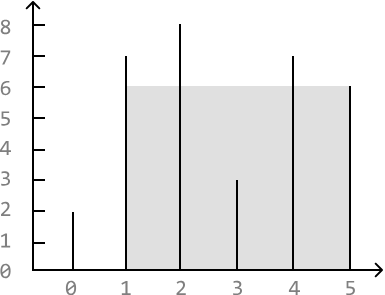

Example
- Input: heights = [2, 7, 8, 3, 7, 6]
- Output: 24

    # 1. Understand - 3-5 minutes
    - Write example inputs/outputs
    - Note constraints
    - Write test cases
    
    # 2. Plan - 5-7 minutes
    - Draw/write algorithm steps
    - Consider time/space complexity
    - Think about edge cases
    
    # 3. Code - 15-20 minutes
    - Write clean, well-structured code
    - Use meaningful variable names
    - Add brief comments for clarity
    
    # 4. Test - 5 minutes
    - Run through test cases
    - Check edge cases
    - Consider optimization

In [122]:
from typing import List


def largest_container(heights: List[int]) -> int:
    # initialize max_container
    max_container = 0

    # initialize left, right pointers
    left = 0
    right = len(heights) - 1

    # while left < right run the loop
    while left < right:
        # compute the container width
        container = min(heights[left], heights[right]) * (right - left)
        # if container > max_container. update max_container
        if container > max_container:
            max_container = container
        # if left ht < rt ht, move left inward
        if heights[left] < heights[right]:
            left += 1
        # elif left ht > rt ht, move right inward
        elif heights[left] > heights[right]:
            right -= 1
        # if both are same, move both inward
        else:
            left += 1
            right -= 1
    # once the loop ends, return the max_container
    return max_container


heights = [2, 7, 8, 3, 7, 6]
largest_container(heights=heights)

24

## Shift Zeroes to the End (refer pdf)

In [154]:
# naive approach
from typing import List


def shift_zeros_to_the_end(nums: List[int]) -> None:
    counter = 0
    for num in nums:
        if num == 0:
            nums.remove(0)
            nums.append(0)
    return nums


nums = [0, 1, 0, 3, 2]
shift_zeros_to_the_end(nums=nums)

[1, 3, 2, 0, 0]

In [172]:
# swap approach
from typing import List


def shift_zeros_to_the_end(nums: List[int]) -> None:
    left = 0
    for right in range(len(nums)):
        if nums[right] != 0:
            nums[left], nums[right] = nums[right], nums[left]
            left += 1
    return nums


nums = [0, 1, 0, 3, 2]
shift_zeros_to_the_end(nums=nums)

[1, 3, 2, 0, 0]

## Next Lexographical Sequence